<a href="https://colab.research.google.com/github/toraaglobal/SentimentAnalysis/blob/master/sentiment_analysis_movie_reviews_MNB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis of Movie Reviews
**Comparing MNB and SVMs for Kaggle Sentiment Classification**
***

The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis, originally collected by Pang and Lee [1]. In their work on sentiment treebanks, Socher et al. [2] used Amazon's Mechanical Turk to create fine-grained labels for all parsed phrases in the corpus. This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: negative, somewhat negative, neutral, somewhat positive, positive. Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.


[Data Source](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/overview)

**Evaluation**
Submissions are evaluated on classification accuracy (the percent of labels that are predicted correctly) for every parsed phrase. The sentiment labels are:

* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

**Import Packages**
The following python packages are used for this analysis

In [0]:
## Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

## vectoriation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

## model evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  # confusion matrix, model evaluation


from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import nltk


%matplotlib inline

**Mount Gdrive**

The gdrive is where the movie reviews data is saved.

In [2]:

## Mount the gdrive
from google.colab import drive
drive.mount('/content/drive')


## change directry to the gdrive

os.chdir('./drive/My Drive/Colab Notebooks/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Read the datasets**

In [3]:
## Read Data

train = pd.read_csv('./kaggle-sentiment/train.tsv', sep='\t')
test = pd.read_csv('./kaggle-sentiment/test.tsv', sep='\t')

print('Train shape : {}'.format(train.shape))
print('Test shape : {}'.format(test.shape))

Train shape : (156060, 4)
Test shape : (66292, 3)


**View Train Data**

In [4]:
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


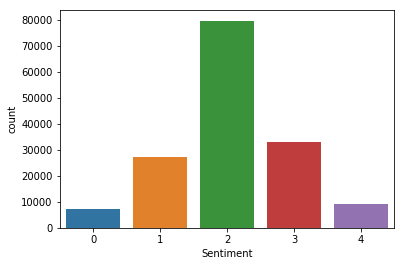

In [5]:
sns.countplot(train.Sentiment)

**Get the baseline accuracy**

In [6]:
## count the propotion for each class for baseline accuracy

unique, count = np.unique(train.Sentiment, return_counts=True)

for clas, i in zip( unique,count):
  print('{} : {}%'.format(clas, (i/len(train) * 100)))

0 : 4.531590413943356%
1 : 17.475970780469048%
2 : 50.99448929898757%
3 : 21.09893630654876%
4 : 5.899013200051263%


The baseline accuracy is 51%

**Vectorization**

MNB: Multinomial Naive Bayes Use count vectorizer as an input. The ngram  count vectorizer willbe used for both MNB and SVM to compared there accuracy in classifying sentiment. SVM did not required any special form of vectorization as input. 


In [0]:
#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')
gram13_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,3), min_df=5, stop_words='english')
gram23_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(2,3), min_df=5, stop_words='english')
gram22_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(2,2), min_df=5, stop_words='english')

**Get train and target features**

In [0]:
## get the phrase and the sentiment
features = train['Phrase'].values
target = train['Sentiment'].values

**Cross Validation Score of the model peformance**

* create a pipeline

In [0]:
## create a pipeline
def score_model_pipeline(model, vectorizer, X,y, cv=5):
  pipe = Pipeline([('vect', vectorizer), ('model', model)])
  scores = cross_val_score(pipe, X,y,cv=cv)
  print('Avg Score: {}'.format(sum(scores)/len(scores)))

**Initial Modeling**

Cross Val Score

In [10]:

## create a model container
model = {}

## add SVM and multinomial naives to the model cointainer
model['SVM'] = LinearSVC()
model['MNB'] = MultinomialNB()

## create a vectorization container
vec = {}

## add vectorizer to the container
vec['ngram12'] =  CountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')
vec['ngram13'] =   CountVectorizer(input="content",encoding='latin-1', ngram_range=(1,3), min_df=5, stop_words='english')
vec['ngram23'] = CountVectorizer(input="content",encoding='latin-1', ngram_range=(2,3), min_df=5, stop_words='english')
vec['ngram22'] =  CountVectorizer(input="content",encoding='latin-1', ngram_range=(2,2), min_df=5, stop_words='english')



## 10 fold cross validation function
## create a pipeline
def score_model_pipeline(model, vectorizer, X,y, cv=3):
  '''10 fold cross validation pipeline and return the average scores'''
  nbc = Pipeline([('vect', vectorizer), ('nb', model)])
  scores = cross_val_score(nbc, X,y,cv=cv)
  print('Avg Score: {}'.format(sum(scores)/len(scores)))
  return sum(scores)/len(scores)


## get features and label from dataframe
def get_X_y_from_df(df, X='text', y='label'):
  '''get the text,features and the label, the target. return features and target'''
  X = list(df[X].values)
  y = df[y].values
  return X,y

## create an emty list to store score
score = []
vec_use = []
model_use= []

## get X and y
X,y = get_X_y_from_df(train, X='Phrase', y='Sentiment')

## run the cross validation using the pipeline
for mod in model:
  # loop through the model in the model container
  for v in vec:
    # loop through the vectorizer in the vectorizer container
    cv = score_model_pipeline(model[mod], vec[v], X,y)
    score.append(cv)  # append the score
    vec_use.append(v)  # append the vectorization used
    model_use.append(mod) # append the model used
    
    
  
## create a date frame of cross validation score of the classifier
result = {'Model': model_use, 'Vectorization': vec_use, '10 fold Avg Score': score}
sentiment_df = pd.DataFrame(result)
sentiment_df

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Avg Score: 0.5663973825451089


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Avg Score: 0.5659232052068622


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Avg Score: 0.5134178193812606
Avg Score: 0.5141482982948832
Avg Score: 0.5566320166097306
Avg Score: 0.555491414133147
Avg Score: 0.5115082946921238
Avg Score: 0.5116300316520662


,Model,Vectorization,10 fold Avg Score
0,SVM,ngram12,0.566397
1,SVM,ngram13,0.565923
2,SVM,ngram23,0.513418
3,SVM,ngram22,0.514148
4,MNB,ngram12,0.556632
5,MNB,ngram13,0.555491
6,MNB,ngram23,0.511508
7,MNB,ngram22,0.511630


In [11]:
sentiment_df

,Model,Vectorization,10 fold Avg Score
0,SVM,ngram12,0.566397
1,SVM,ngram13,0.565923
2,SVM,ngram23,0.513418
3,SVM,ngram22,0.514148
4,MNB,ngram12,0.556632
5,MNB,ngram13,0.555491
6,MNB,ngram23,0.511508
7,MNB,ngram22,0.511630


**Train Test Split**
* Create a train and test set. The test set is used to evaluate the model performance

In [12]:
## Train test split

X_train, X_test, y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=0)

print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_train.shape))

X_train: (109242,)
X_test: (46818,)
y_train: (109242,)
y_test: (109242,)


**Data Prep**



In [0]:
## vectorization

X_train_vec = gram12_count_vectorizer.fit_transform(X_train)

X_test_vec = gram12_count_vectorizer.transform(X_test)



## get features names
feature_names = gram12_count_vectorizer.get_feature_names()


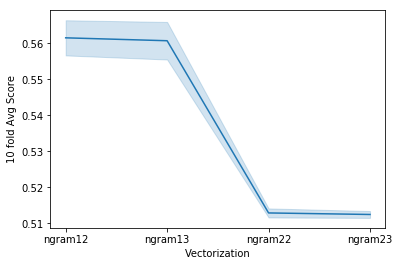

In [14]:

sns.lineplot(sentiment_df.Vectorization,sentiment_df['10 fold Avg Score'])


Text(0.5, 1.0, 'SVM vs MNB')

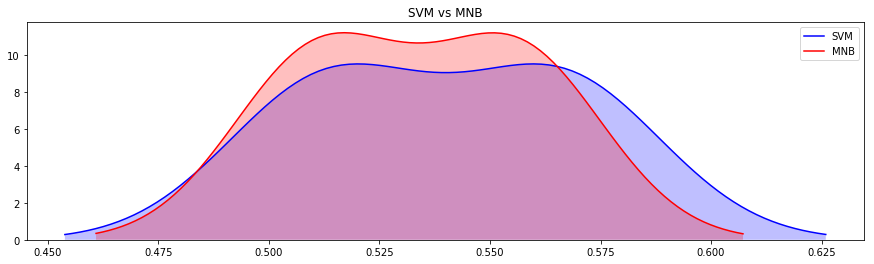

In [15]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(sentiment_df.loc[(sentiment_df['Model'] == 'SVM'),'10 fold Avg Score'] , color='b',shade=True, label='SVM')
ax=sns.kdeplot(sentiment_df.loc[(sentiment_df['Model'] == 'MNB'),'10 fold Avg Score'] , color='r',shade=True, label='MNB')
plt.title('SVM vs MNB')

**Modeling**

### MNB

In [16]:
## MNB
mnb_model =  MultinomialNB()

mnb_model.fit(X_train_vec, y_train)

mnb_prediction = mnb_model.predict(X_test_vec)

## Classification Report
report = classification_report(mnb_prediction, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.32      0.40      0.36      1785
           1       0.43      0.48      0.46      7335
           2       0.75      0.70      0.73     26010
           3       0.49      0.51      0.50      9469
           4       0.35      0.43      0.39      2219

    accuracy                           0.60     46818
   macro avg       0.47      0.50      0.49     46818
weighted avg       0.62      0.60      0.61     46818



In [17]:
## Confusion matrix
mnb_cm  = confusion_matrix(mnb_prediction, y_test)
print(mnb_cm)

[[  708   687   345    41     4]
 [  948  3533  2429   395    30]
 [  480  3464 18138  3572   356]
 [   48   411  2800  4798  1412]
 [    9    44   312   889   965]]


**Feature Importance**: MNB

In [18]:

# feature importance
featLogProb = []
ind = 0
for feats in feature_names:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(mnb_model.feature_log_prob_[1,ind] - mnb_model.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1
    



000  0.7035674235406244

000 times  0.7035674235406244

10  0.12548957276546524

10 000  0.7035674235406244

10 15  0.5491955449547437

10 course  0.7035674235406244

10 minutes  0.2727845074481703

10 seconds  0.9912494959924061

10 year  1.242342725514689

10 years  0.7035674235406244

100  0.5957155605896371

100 minute  0.6827269375792664

100 minutes  0.2981023154324607

100 years  0.7035674235406244

101  0.5494167437133655

101 minutes  0.3950448651274847

101 premise  0.010420242980679006

101 study  0.010420242980679006

102  1.08819204568743

102 minute  1.08819204568743

103  0.3950448651274847

103 minute  0.3950448651274847

104  0.4158853510888427

104 minutes  0.4158853510888427

105  1.8021797122087335

105 minutes  1.8021797122087335

10th  0.7035674235406244

10th grade  0.7035674235406244

11  0.010420242980679006

11 new  0.7035674235406244

11 period  0.7035674235406244

11 rrb  0.6827269375792664

11 terrorist  0.010420242980679006

11 times  0.010420242980679006


In [19]:


#feats_sorted = sorted(featLogProb , reverse = True)
## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(10):
    s = ""
    s += feature_names[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)

meaningless vapid:  3.699299697094615

devoid substance:  3.5367807675968415

somewhat:  3.080622210377637

definitely meaningless:  3.0061525165346694

little puddle:  3.0061525165346694

puddle:  3.0061525165346694

puddle movie:  3.0061525165346694

silly little:  3.0061525165346694

vapid devoid:  3.0061525165346694

hours precious:  2.9007920008768444



In [20]:


#feats_sorted = sorted(featLogProb , reverse = True)
## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = False)
for i in range(10):
    s = ""
    s += feature_names[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)

ballistic:  0.01042024298067723

blonde:  0.01042024298067723

chills:  0.01042024298067723

considerable:  0.01042024298067723

cross:  0.01042024298067723

excited:  0.01042024298067723

explosion:  0.01042024298067723

farts urine:  0.01042024298067723

generate:  0.01042024298067723

gun:  0.01042024298067723



### SVM

In [21]:
# initialize the LinearSVC model
svm_model = LinearSVC(C=1)


# use the training data to train the model
svm_model.fit(X_train_vec,y_train)


# make prediction
svm_prediction = svm_model.predict(X_test_vec)

# get classification report
print(classification_report(svm_prediction, y_test))

              precision    recall  f1-score   support

           0       0.36      0.48      0.41      1663
           1       0.44      0.53      0.48      6703
           2       0.82      0.71      0.76     27775
           3       0.48      0.55      0.51      8458
           4       0.40      0.49      0.44      2219

    accuracy                           0.64     46818
   macro avg       0.50      0.55      0.52     46818
weighted avg       0.67      0.64      0.65     46818



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
## print confusion matrix
svm_cm = confusion_matrix(svm_prediction, y_test)
print(svm_cm)

[[  793   678   170    17     5]
 [  971  3546  1902   269    15]
 [  371  3581 19725  3815   283]
 [   50   307  2091  4644  1366]
 [    8    27   136   950  1098]]


**Feature Importtance**

In [23]:
## Linear SVC also ranks all features based on their contribution to distinguish the two concepts in each binary classifier
## For category "0" (very negative), get all features and their weights and sort them in increasing order
feature_ranks = sorted(zip(svm_model.coef_[0],gram12_count_vectorizer.get_feature_names()))


## get the 10 features that are best indicators of very negative sentiment (they are at the bottom of the ranked list)
very_negative_10 = feature_ranks[-10:]
print("Very negative words")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

Very negative words
(1.7328338749393966, 'stinks')
(1.796905505260544, 'entirely witless')
(1.8028028099486615, 'unwatchable')
(1.8658641834787204, 'disgusting')
(1.8687740220437172, 'disappointingly')
(1.8888413739815713, 'unappealing')
(1.894653823341645, 'turd')
(1.8958294859235378, 'uninspiring')
(1.8994517668562927, 'distasteful')
(1.9658503491785337, 'pompous')



In [24]:
## get 10 features that are least relevant to "very negative" sentiment (they are at the top of the ranked list)
not_very_negative_10 = feature_ranks[:10]
print("not very negative words")
for i in range(0, len(not_very_negative_10)):
    print(not_very_negative_10[i])
print()

not very negative words
(-1.9174361577421757, 'good good')
(-1.9076715585094706, 'admitted')
(-1.8895652255249964, 'variation')
(-1.7418898576568884, 'director ca')
(-1.7370826771474754, 'acting ensemble')
(-1.699243727317461, 'hawke')
(-1.694965262152606, 'demographically')
(-1.664883201034118, 'bad painfully')
(-1.4254633272175659, 'bad boy')
(-1.3843725154479822, 'dreck usually')



In [25]:
## Linear SVC also ranks all features based on their contribution to distinguish the two concepts in each binary classifier
## For category "0" (very negative), get all features and their weights and sort them in increasing order
feature_ranks = sorted(zip(svm_model.coef_[4],gram12_count_vectorizer.get_feature_names()))


## get the 10 features that are best indicators of very negative sentiment (they are at the bottom of the ranked list)
very_positive_10 = feature_ranks[-10:]
print("Very positive words")
for i in range(0, len(very_positive_10)):
    print(very_positive_10[i])
print()

Very positive words
(1.6987127046959025, 'gem')
(1.7016030522827283, 'flawless')
(1.7133719911052452, 'standout')
(1.795300801961574, 'masterpeice')
(1.820385476588509, 'amazing')
(1.834349314484275, 'cut rest')
(1.8934138128915854, 'miraculous')
(1.9405567600888807, 'wo disappointed')
(2.015682064508662, 'masterpiece')
(2.141910168394018, 'perfection')



In [26]:
## get 10 features that are least relevant to "very negative" sentiment (they are at the top of the ranked list)
not_very_positive_10 = feature_ranks[:10]
print("not very positive words")
for i in range(0, len(not_very_positive_10)):
    print(not_very_positive_10[i])
print()

not very positive words
(-2.0877105393997857, 'breezy')
(-1.9290990284513494, 'american add')
(-1.8032582000851585, 'bore')
(-1.694005871139368, 'lovely amazing')
(-1.6891989282003703, 'brainpower coupled')
(-1.6777992361054617, 'stops')
(-1.66801011219219, 'rrb experiment')
(-1.6547593403561887, 'epic astonishing')
(-1.652819695726241, 'letting')
(-1.6518494926800282, 'say unburdened')



**Interpretation**

In [27]:
## get the confidence scores for all test examples from each of the five binary classifiers
svm_confidence_scores = svm_model.decision_function(X_test_vec)

## get the confidence score for the first test example
print(svm_confidence_scores[0])

## sample output: array([-1.05306321, -0.62746206,  0.31074854, -0.89709483, -1.08343089]
## because the confidence score is the highest for category 2, 
## the prediction should be 2. 

## Confirm by printing out the actual prediction
print(y_test[0])

[-1.45562191 -0.73396577  0.62014781 -1.09628175 -1.15718116]
2


**Error Analysis**

In [28]:
# print out specific type of error for further analysis

# print out the very positive examples that are mistakenly predicted as negative
# according to the confusion matrix, there should be 5 such examples
# note if you use a different vectorizer option, your result might be different

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==4 and svm_prediction[i]==0):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

10 minutes into the film you 'll be white-knuckled and unable to look away .
's unlikely we 'll see a better thriller this year .
there 's no way you wo n't be talking about the film once you exit the theater .
drawn engaging characters
's unlikely we 'll see a better thriller this year
errors: 5


In [29]:
# very positive and its predicted as negative


err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==4 and svm_prediction[i]==1):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

leaves us laughing
nothing short of a great one
like E.T. the first time I saw it as a young boy
Funny , somber , absurd , and , finally , achingly sad ,
He does this so well you do n't have the slightest difficulty accepting him in the role .
favorite
slam-dunk
Cold , nervy and memorable
very thrilling
Unfolds with such a wallop of you-are-there immediacy that when the bullets start to fly , your first instinct is to duck .
gloriously flippant as Lock , Stock and Two Smoking Barrels
particularly innovative
particularly good
ca n't go wrong .
Greg Kinnear gives a mesmerizing performance as a full-fledged sex addict who is in complete denial about his obsessive behavior .
errors: 15


**Feature Engineering**

In [0]:
## function for negative detection

def has_negation(post):
    pattern_neg_1 = re.compile(r'\b(not|no|never)\b')
    pattern_neg_2 = re.compile(r'\b([a-z]+less)\b')
    if pattern_neg_1.search(post.lower()) or pattern_neg_2.search(post.lower()):
        return 1
    else: 
        return 0

In [31]:
txts = ['this is good', 'this is bad', 'this is not good', 'this is not bad', 'this is useless']
df = pd.DataFrame({'text':txts})
pattern_neg = re.compile(r'\b(not|no|never)\b')
print(df)

               text
0      this is good
1       this is bad
2  this is not good
3   this is not bad
4   this is useless


In [32]:
## apply the function

df['neg'] = df['text'].apply(lambda x: 1 if has_negation(x) else 0)
print(df)

               text  neg
0      this is good    0
1       this is bad    0
2  this is not good    1
3   this is not bad    1
4   this is useless    1


**Now vectorize the text and combine the word vectors with the negation feature values.**

In [33]:
from scipy import sparse

vecs = gram12_count_vectorizer.transform(df['text']).astype(float)
#print(vecs)
X_dense = df[['neg']]
X_sparse = vecs
X = sparse.hstack([X_sparse, X_dense]).tocsr()
print(X)

  (0, 15280)	1.0
  (1, 2499)	1.0
  (2, 15280)	1.0
  (2, 40993)	1.0
  (3, 2499)	1.0
  (3, 40993)	1.0
  (4, 38622)	1.0
  (4, 40993)	1.0


**Now Apply the function to the Data**

In [0]:
y=train['Sentiment']

pattern_neg = re.compile(r'\b(not|no|never)\b')
train['neg'] = train['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = train[['neg']]
X_sparse = gram12_count_vectorizer.fit_transform(train['Phrase']).astype(float)
X = sparse.hstack([X_sparse, X_dense]).tocsr()

In [35]:
%%time
# test the model with negation detection

svm_model = LinearSVC()
scores = cross_val_score(svm_model, X, y, cv=3, n_jobs=3)
avg=sum(scores)/len(scores)
print(avg)

0.5641033748221443
CPU times: user 99.2 ms, sys: 86.2 ms, total: 185 ms
Wall time: 3min


In [36]:
%%time
# test the model without negation detection
# note this cross validation is not the standard pipeline method
# but a cut-corner version that does vectorization first and then train/test models
# this cut-corner version would allow the model to see the text of the test data, 
# but the model would still not see the labels of the test data
svm_model2= LinearSVC()
scores2 = cross_val_score(svm_model2, X_sparse, y, cv=3, n_jobs=3)
avg2=sum(scores2)/len(scores2)
print(avg2)

0.5635138589542912
CPU times: user 86.5 ms, sys: 14.1 ms, total: 101 ms
Wall time: 2min 58s


In [37]:
svm_model = LinearSVC()

svm_model.fit(X,y)

########## submit to Kaggle submission


# preserve the id column of the test examples
kaggle_ids= test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec= gram12_count_vectorizer.transform(kaggle_X_test)


## add feaure to X_test
pattern_neg = re.compile(r'\b(not|no|never)\b')
test['neg'] = test['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = test[['neg']]

kaggle_X = sparse.hstack([kaggle_X_test_vec, X_dense]).tocsr()


# predict 
kaggle_pred=svm_model.predict(kaggle_X)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('kaggle_submission_linearSVC.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Kaggle test score:** 61.037% 

**Model Optimization**

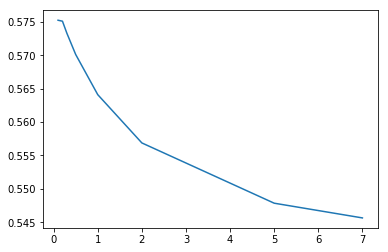

CPU times: user 840 ms, sys: 206 ms, total: 1.05 s
Wall time: 17min 4s


In [38]:
%%time

c = [0.1,0.2, 0.3, 0.5, 1, 2,5,7]

score = []

for i in c:
  svm_model = LinearSVC(C=i)
  scores = cross_val_score(svm_model, X, y, cv=3, n_jobs=3)
  avg=sum(scores)/len(scores)
  score.append(avg)


plt.figure()
plt.plot(c,score)
plt.show()

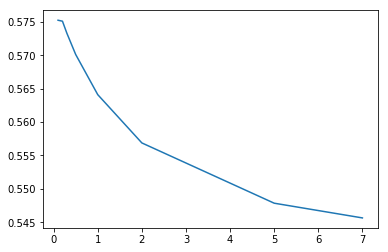

In [39]:
sns.lineplot(c,score)

CPU times: user 1.04 s, sys: 207 ms, total: 1.24 s
Wall time: 11min 46s


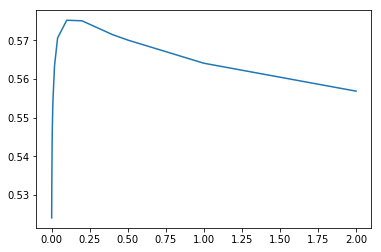

In [40]:
%%time

c = [0.001, 0.002, 0.004, 0.005, 0.008, 0.01, 0.02,0.04, 0.1, 0.2, 0.4,0.5,1,2]

score = []

for i in c:
  svm_model = LinearSVC(C=i)
  scores = cross_val_score(svm_model, X, y, cv=3, n_jobs=3)
  avg=sum(scores)/len(scores)
  score.append(avg)
  
  
sns.lineplot(c,score)

**C=0.2**

In [0]:
svm_model = LinearSVC(C=0.2)

svm_model.fit(X,y)

########## submit to Kaggle submission


# preserve the id column of the test examples
kaggle_ids= test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec= gram12_count_vectorizer.transform(kaggle_X_test)


## add feaure to X_test
pattern_neg = re.compile(r'\b(not|no|never)\b')
test['neg'] = test['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = test[['neg']]

kaggle_X = sparse.hstack([kaggle_X_test_vec, X_dense]).tocsr()


# predict 
kaggle_pred=svm_model.predict(kaggle_X)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('kaggle_submission_linearSVC-0.2.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()

**kaggle Test Score**: 60.945%

**C=0.1**

In [0]:
svm_model = LinearSVC(C=0.1)

svm_model.fit(X,y)

########## submit to Kaggle submission


# preserve the id column of the test examples
kaggle_ids= test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec= gram12_count_vectorizer.transform(kaggle_X_test)


## add feaure to X_test
pattern_neg = re.compile(r'\b(not|no|never)\b')
test['neg'] = test['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = test[['neg']]

kaggle_X = sparse.hstack([kaggle_X_test_vec, X_dense]).tocsr()


# predict 
kaggle_pred=svm_model.predict(kaggle_X)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('kaggle_submission_linearSVC-0.2.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()

Kaggle score: 60.366%

C=2

In [43]:
svm_model = LinearSVC(C=2)

svm_model.fit(X,y)

########## submit to Kaggle submission


# preserve the id column of the test examples
kaggle_ids= test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec= gram12_count_vectorizer.transform(kaggle_X_test)


## add feaure to X_test
pattern_neg = re.compile(r'\b(not|no|never)\b')
test['neg'] = test['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = test[['neg']]

kaggle_X = sparse.hstack([kaggle_X_test_vec, X_dense]).tocsr()


# predict 
kaggle_pred=svm_model.predict(kaggle_X)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('kaggle_submission_linearSVC-0.2.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Score = 60.47%

**C=1 has the highest score of 61% on kaggle test set**

**Tune Penalty**

In [44]:
%%time
# test the model with negation detection

svm_model = LinearSVC(C=1)
scores = cross_val_score(svm_model, X, y, cv=3, n_jobs=3)
avg=sum(scores)/len(scores)
print(avg)

0.5641033748221443
CPU times: user 85.4 ms, sys: 12.1 ms, total: 97.5 ms
Wall time: 2min 58s


## Unigram and Bigram

In [45]:

## create a model container
model = {}

## add SVM and multinomial naives to the model cointainer
model['SVM'] = LinearSVC()
model['MNB'] = MultinomialNB()

## create a vectorization container
vec = {}

## add vectorizer to the container
vec['ngram12'] =  CountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')
vec['unigram'] =   CountVectorizer(input="content",encoding='latin-1', binary=False, min_df=5, stop_words='english')


## 10 fold cross validation function
## create a pipeline
def score_model_pipeline(model, vectorizer, X,y, cv=3):
  '''10 fold cross validation pipeline and return the average scores'''
  nbc = Pipeline([('vect', vectorizer), ('nb', model)])
  scores = cross_val_score(nbc, X,y,cv=cv)
  print('Avg Score: {}'.format(sum(scores)/len(scores)))
  return sum(scores)/len(scores)


## get features and label from dataframe
def get_X_y_from_df(df, X='text', y='label'):
  '''get the text,features and the label, the target. return features and target'''
  X = list(df[X].values)
  y = df[y].values
  return X,y

## create an emty list to store score
score = []
vec_use = []
model_use= []

## get X and y
X,y = get_X_y_from_df(train, X='Phrase', y='Sentiment')

## run the cross validation using the pipeline
for mod in model:
  # loop through the model in the model container
  for v in vec:
    # loop through the vectorizer in the vectorizer container
    cv = score_model_pipeline(model[mod], vec[v], X,y)
    score.append(cv)  # append the score
    vec_use.append(v)  # append the vectorization used
    model_use.append(mod) # append the model used
    
    
  
## create a date frame of cross validation score of the classifier
result = {'Model': model_use, 'Vectorization': vec_use, '10 fold Avg Score': score}
sentiment_df = pd.DataFrame(result)
sentiment_df

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Avg Score: 0.5663973825451089


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Avg Score: 0.5659681679010652
Avg Score: 0.5566320166097306
Avg Score: 0.56130332522098


,Model,Vectorization,10 fold Avg Score
0,SVM,ngram12,0.566397
1,SVM,unigram,0.565968
2,MNB,ngram12,0.556632
3,MNB,unigram,0.561303


* C =1
* bigram
* feature engineering
* error analysis
*SVM(C=1)

In [46]:
svm_model = LinearSVC(C=1)


# use the training data to train the model
svm_model.fit(X_train_vec,y_train)


# make prediction
svm_prediction = svm_model.predict(X_test_vec)

# get classification report
print(classification_report(svm_prediction, y_test))

              precision    recall  f1-score   support

           0       0.36      0.48      0.41      1663
           1       0.44      0.53      0.48      6703
           2       0.82      0.71      0.76     27775
           3       0.48      0.55      0.51      8458
           4       0.40      0.49      0.44      2219

    accuracy                           0.64     46818
   macro avg       0.50      0.55      0.52     46818
weighted avg       0.67      0.64      0.65     46818



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
## print confusion matrix
svm_cm = confusion_matrix(svm_prediction, y_test)
print(svm_cm)

[[  793   678   170    17     5]
 [  971  3546  1902   269    15]
 [  371  3581 19725  3815   283]
 [   50   307  2091  4644  1366]
 [    8    27   136   950  1098]]


### **Negative Error Analysis**

In [48]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==0 and svm_prediction[i]==4):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

the film is not entirely successful
achieves the remarkable feat of squandering a topnotch foursome of actors
the spell they cast is n't the least bit mesmerizing
emotionally belittle a cinema classic .
But if the essence of magic is its make-believe promise of life that soars above the material realm , this is the opposite of a truly magical movie .
is not Edward Burns ' best film
Once the expectation of laughter has been quashed by whatever obscenity is at hand , even the funniest idea is n't funny .
It may not be a great piece of filmmaking ,
errors: 8


In [49]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==0 and svm_prediction[i]==3):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

When it comes out on video , then it 's the perfect cure for insomnia .
squeeze the action and our emotions into the all-too-familiar dramatic arc of the Holocaust escape story
an unendurable viewing experience
A chiller resolutely without chills .
The lead actors share no chemistry or engaging charisma .
Franco is an excellent choice for the walled-off but combustible hustler , but he does not give the transcendent performance SONNY needs to overcome gaps in character development and story logic .
is n't one moment in the film that surprises or delights .
unendurable viewing experience
A thriller without a lot of thrills .
without beauty or humor
just that it 's so not-at-all-good
It 's Splash without the jokes .
Director Douglas McGrath takes on Nickleby with all the halfhearted zeal of an 8th grade boy delving into required reading .
Watch Barbershop again if you 're in need of a Cube fix -- this is n't worth sitting through
nothing funny in this every-joke-has - been-told-a
is neit

In [50]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==0 and svm_prediction[i]==2):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

so incredibly inane
sucked
does n't make for great cinema
their cruel fate
phony humility
agonizing
But one thing 's for sure : It never comes close to being either funny or scary .
has the disadvantage of also looking cheap
There 's already been too many of these films ...
, empty sub-music video style
that scalds like acid
seeing because it 's so bad
too many scenarios in which the hero might have an opportunity to triumphantly sermonize , and too few that allow us to wonder for ourselves if things will turn out okay .
is flawed
Priggish , lethargically paced parable of renewal .
the German film industry can not make a delightful comedy centering on food
What you expect is just what you get ... assuming the bar of expectations has n't been raised above sixth-grade height .
as bad a film
A sleep-inducingly slow-paced crime drama
, sloppy
-LRB- Allen 's -RRB- been making piffle for a long while ,
ponderous awfulness of its script
avoid
's not nearly enough that 's right
like bad cinema

In [51]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==1 and svm_prediction[i]==4):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

The film makes strong arguments regarding the social status of America 's indigenous people , but really only exists to try to eke out an emotional tug of the heart , one which it fails to get
's not a great monster movie .
It 's not a particularly good film , but neither is it a monsterous one
one that was hard for me to warm up to
that was hard for me to warm up to
's not a great monster movie
The fact that the ` best part ' of the movie comes from a 60-second homage to one of Demme 's good films
extraordinarily silly thriller
It may not be a great piece of filmmaking
is n't the least bit mesmerizing
At best this is a film for the under-7 crowd .
No amount of good acting
It 's not a particularly good film
fails to unlock the full potential of what is in many ways a fresh and dramatically substantial spin on the genre
Diane Lane 's sophisticated performance ca n't rescue Adrian Lyne 's Unfaithful from its sleazy moralizing .
the superficially written characters ramble on tediously abo

In [52]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==1 and svm_prediction[i]==3):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

is n't very good
leave feeling like you 've endured a long workout without your pulse ever racing .
Sheridan had a wonderful account to work from , but , curiously , he waters it down , turning grit and vulnerability into light reading .
sacrificing the integrity of the opera
certainly does n't feel like a film that strays past the two and a half mark
Although ... visually striking and slickly staged , it 's also cold , grey , antiseptic and emotionally desiccated .
themselves are n't all that interesting
If Oscar had a category called Best Bad Film You Thought Was Going To Be Really Awful But Was n't , Guys would probably be duking it out with The Queen of the Damned for the honor .
It is bad , but certainly not without merit as entertainment .
impossible spot
that no amount of earnest textbook psychologizing can bridge
that were once amusing
flickering out by its perfunctory conclusion
dull thriller
Though intrepid in exploring an attraction that crosses sexual identity , Ozpetek fal

**Observation**

### **Positive Error Analysis**

In [53]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==4 and svm_prediction[i]==0):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

10 minutes into the film you 'll be white-knuckled and unable to look away .
's unlikely we 'll see a better thriller this year .
there 's no way you wo n't be talking about the film once you exit the theater .
drawn engaging characters
's unlikely we 'll see a better thriller this year
errors: 5


In [54]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==4 and svm_prediction[i]==1):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

leaves us laughing
nothing short of a great one
like E.T. the first time I saw it as a young boy
Funny , somber , absurd , and , finally , achingly sad ,
He does this so well you do n't have the slightest difficulty accepting him in the role .
favorite
slam-dunk
Cold , nervy and memorable
very thrilling
Unfolds with such a wallop of you-are-there immediacy that when the bullets start to fly , your first instinct is to duck .
gloriously flippant as Lock , Stock and Two Smoking Barrels
particularly innovative
particularly good
ca n't go wrong .
Greg Kinnear gives a mesmerizing performance as a full-fledged sex addict who is in complete denial about his obsessive behavior .
errors: 15


In [55]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==4 and svm_prediction[i]==2):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

well-executed
make Paid in Full worth seeing .
12th Oscar nomination
The case is a convincing one , and should give anyone with a conscience reason to pause .
You never know where Changing Lanes is going to take you
inspiring ,
sheerly beautiful
whose achievements -- and complexities -- reached far beyond the end zone
very bright
interested in Anne Geddes , John Grisham , and Thomas Kincaid
that most frightening of all movies --
a better movie experience
I 'd watch these two together again in a New York minute .
a bravura performance
There 's no reason to miss Interview with the Assassin
Blessed
a solid , anguished performance
Clayburgh and Tambor are charming performers ;
Ford effortlessly filled with authority
has the sizzle of old news that has finally found the right vent -LRB- accurate
Puts to rest any thought that the German film industry can not make a delightful comedy centering on food .
distinct and very welcome
you crave Chris Smith 's next movie
A first-class , thoroughly i

In [56]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==3 and svm_prediction[i]==0):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

you realize there 's no place for this story to go but down
both a great and a terrible story
Even at its worst , it 's not half-bad .
sucks you in and
's no way you wo n't be talking about the film once you exit the theater
Kosminsky ... puts enough salt into the wounds of the tortured and self-conscious material to make it sting .
a comedic moment in this romantic comedy
a pathetic , endearing hero
a great and a terrible story
Its impressive images of crematorium chimney fires and stacks of dead bodies
is funny enough to justify the embarrassment of bringing a barf bag to the moviehouse .
interesting concept
There are problems with this film that even 3 Oscar winners ca n't overcome , but it 's a nice girl-buddy movie once it gets rock-n-rolling
enough substance in the story to actually give them life
never fails to fascinate .
without neglecting character development for even one minute
pathetic , endearing
errors: 17


In [57]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==3 and svm_prediction[i]==1):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

is too savvy a filmmaker to let this morph into a typical romantic triangle .
`` gory mayhem '' is your idea of a good time
seems to really care
its leaden acting , dull exposition
will be impressed by this tired retread
drains it
Tackles the difficult subject of grief and loss
a rush
This one is not nearly as dreadful as expected .
flawed humanity
it does cathartic truth telling
good little movie
A weird , arresting little ride .
incapable of being boring
will welcome or accept The Trials of Henry Kissinger as faithful portraiture
seems endless
a nice change of mindless pace in collision
audacity and openness
are side stories aplenty
effective on stage
enough to provide the pleasures of a slightly naughty , just-above-average off - Broadway play
be pleased
The sentimental script has problems , but the actors pick up the slack .
Appropriately cynical social commentary aside
A film with a great premise but only a great premise .
assured of the wrong things
Memorable for a peculiar malai

**Positive Error Observation**

**Using nltk stemmer to see if it will improve the performance of the model**

In [0]:
## eglish stemmer
english_stemmer = nltk.stem.SnowballStemmer('english')

## class to tem and vectorized doc
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

In [0]:
##  stem vectorizer
stem_ngram_vectorizer = StemmedCountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english', analyzer="word")

In [0]:
y=train['Sentiment']

pattern_neg = re.compile(r'\b(not|no|never)\b')
train['neg'] = train['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = train[['neg']]
X_sparse = stem_ngram_vectorizer.fit_transform(train['Phrase']).astype(float)
X = sparse.hstack([X_sparse, X_dense]).tocsr()

In [61]:
svm_model = LinearSVC(C=1)

svm_model.fit(X,y)

########## submit to Kaggle submission


# preserve the id column of the test examples
kaggle_ids= test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec= stem_ngram_vectorizer.transform(kaggle_X_test)


## add feaure to X_test
pattern_neg = re.compile(r'\b(not|no|never)\b')
test['neg'] = test['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = test[['neg']]

kaggle_X = sparse.hstack([kaggle_X_test_vec, X_dense]).tocsr()


# predict 
kaggle_pred=svm_model.predict(kaggle_X)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('kaggle_submission_linearSVC-stem.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Kaggle Test Score = 60.7%

### **Highest Test Score Model**

In [62]:
y=train['Sentiment']

pattern_neg = re.compile(r'\b(not|no|never)\b')
train['neg'] = train['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = train[['neg']]
X_sparse = gram12_count_vectorizer.fit_transform(train['Phrase']).astype(float)
X = sparse.hstack([X_sparse, X_dense]).tocsr()




svm_model = LinearSVC()

svm_model.fit(X,y)

########## submit to Kaggle submission


# preserve the id column of the test examples
kaggle_ids= test['PhraseId'].values

# read in the text content of the examples
kaggle_X_test=test['Phrase'].values

# vectorize the test examples using the vocabulary fitted from the 60% training data
kaggle_X_test_vec= gram12_count_vectorizer.transform(kaggle_X_test)


## add feaure to X_test
pattern_neg = re.compile(r'\b(not|no|never)\b')
test['neg'] = test['Phrase'].apply(lambda x: 1 if pattern_neg.search(x.lower()) else 0)

X_dense = test[['neg']]

kaggle_X = sparse.hstack([kaggle_X_test_vec, X_dense]).tocsr()


# predict 
kaggle_pred=svm_model.predict(kaggle_X)

# combine the test example ids with their predictions
kaggle_submission=zip(kaggle_ids, kaggle_pred)

# prepare output file
outf=open('kaggle_submission_linearSVC-final.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission): outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Score: 61.037%